This Jupyter Notebook will go through the linear regression and principle component analysis. 

The idea is taken from

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Written by Shing Chi Leung at 24 February 2021

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# for digit classification
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# face identification
from sklearn.datasets import fetch_lfw_people

In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


# Single Variable Linear Regression

In this part I will use linear regression to study how the preparation hours of students are relation to their final examination results. 

In [ ]:
file_path = "gdrive/MyDrive/Colab Notebooks/student_scores.csv"

df = pd.read_csv(file_path)

print(df.head(5))
df.describe()

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Then I will visualize the data to see its trend. 

Text(0, 0.5, 'Scores')

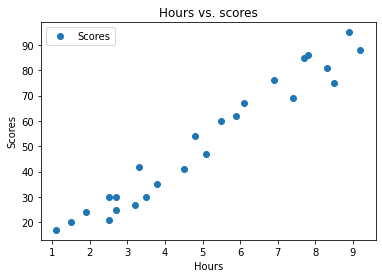

In [ ]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs. scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

The linear trend is a promising sign that linear regression can be sufficient. Then I need to split the data into training set and test set, and use the training set to fit the linear regression model. 

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept = {}".format(regressor.intercept_))
print("slope = {}".format(regressor.coef_))

Intercept = 1.8812370399949785
slope = [9.88174221]


I use the trained model to do the prediction and study the accuracy of the model.

In [ ]:
y_pred = regressor.predict(x_test)

df2 = pd.DataFrame(data={"actual":y_test, "predicted":y_pred})
df2.head(5)

,actual,predicted
0,41,46.349077
1,88,92.793265
2,24,20.656547
3,30,26.585593
4,95,89.828743


In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.414291968766088
Mean Squared Error: 20.233354795699576
Root Mean Squared Error: 4.498150152640481


# Multi-Variable Linear Regression 

In this section, I will use multi-linear regression to study how the petrol consumption is correlated to a number of variables, such as petrol tax, income and so on. 

In [ ]:
df3 = pd.read_csv('gdrive/MyDrive/Colab Notebooks/petrol_consumption.csv')

print(df3.head(5))
df3.describe()

   Petrol_tax  Average_income  ...  Population_Driver_licence(%)  Petrol_Consumption
0         9.0            3571  ...                         0.525                 541
1         9.0            4092  ...                         0.572                 524
2         9.0            3865  ...                         0.580                 561
3         7.5            4870  ...                         0.529                 414
4         8.0            4399  ...                         0.544                 410

[5 rows x 5 columns]


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


I will extract the relevant columns and separate the data and the labels. After that I separate the data into training and test sets. I use the training set to train the linear regression model. 

In [ ]:
x = df3[['Petrol_tax', 'Average_income', 'Paved_Highways',
        'Population_Driver_licence(%)']]
y = df3['Petrol_Consumption']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-34.880368
Average_income,-0.066755
Paved_Highways,-0.002028
Population_Driver_licence(%),1334.262984


After training, I use the model to do the prediction. 

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df4 = pd.DataFrame(data={"actual":y_test, "predicted":y_pred})
df4.head(5)

,actual,predicted
33,628,616.278179
13,508,569.320724
15,635,608.989349
0,541,524.669011
40,587,665.178289


In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 37.81016040907214
Mean Squared Error: 2206.295316638215
Root Mean Squared Error: 46.971217959918974


# PCA Analysis

In this part I will use principle component analysis to classify written digits. I will make use ofthe principle components to identify the key features of different digits. 

First I will load the data from sklearn dataset.

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


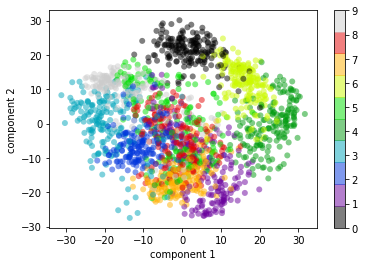

In [ ]:
plt.scatter(projected[:,0], projected[:,1], c=digits.target, edgecolor="none", alpha=0.5, cmap=plt.cm.get_cmap("nipy_spectral", 10))
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()

In a low dimensional decomposition, the data are mixed together. This means a higher order decomposition / projection is dnecessary. 

Text(0, 0.5, 'cumulative explained variance')

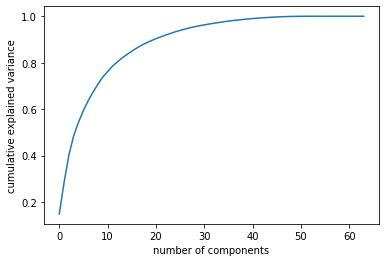

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

It shows that to achieve about 90% accuracy, about 30 components are necessary. Then we study how the principle component identify the key features of different digits. To do so, I add noise to the images. 

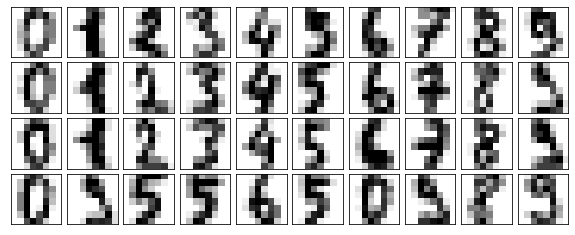

In [ ]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10,4), subplot_kw={"xticks":[], "yticks":[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8), cmap="binary", interpolation="nearest", clim=(0,16))

plot_digits(digits.data)

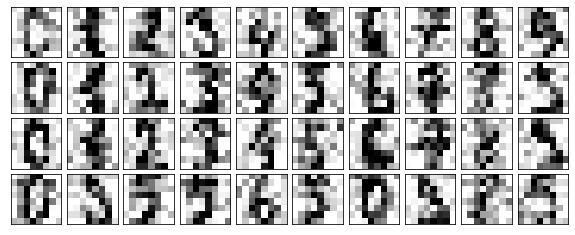

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

The noisy image provides extra challenge for bare eyes to identify the number. Then I use the trained PCA model to filter the noise. 

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

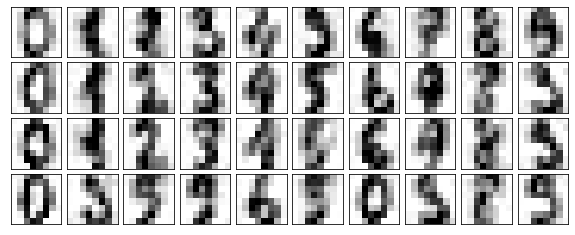

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

The filtered image becomes much cleaner. It is because the noise does not belong to any essential features extracted from the images. 

# Face Identification

In this part, I will use PCA to identify faces of celebrities. This relies on the dataset library of sklearn. 

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


After loading the data, I will train the PCA model with these faces, and study what are the important components of these faces. 

In [ ]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

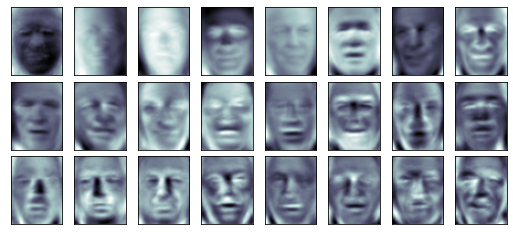

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9,4), subplot_kw={"xticks":[], "yticks":[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62,47), cmap="bone")

Text(0, 0.5, 'cumulative explained variance')

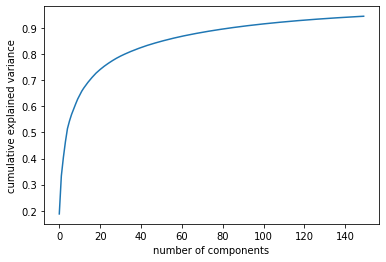

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

Again, a training of about 70 components are necessary to reach an accuracy of about 90%. 

In [ ]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

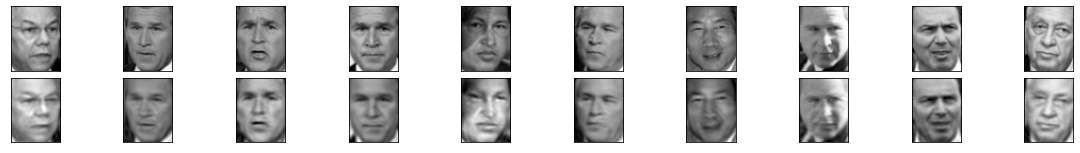

In [ ]:
fig, ax = plt.subplots(2, 10, figsize=(20, 2.5), subplot_kw={"xticks":[], "yticks":[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0,i].imshow(faces.data[i].reshape(62,47), cmap="binary_r")
  ax[1,i].imshow(projected[i].reshape(62,47), cmap="binary_r")

With about 150 components, we can see most features of the celebrities' faces can be resemble to a high accuracy, especailly with some visible smearing about the mouth. 